In [2]:
import numpy
import scipy
import seaborn
import pandas
import struct
import matplotlib.pyplot as plt
%matplotlib ipympl

In [3]:
plt.close()

In [4]:
data_path = "data/"

# load signal and peak positions 

with open(data_path + 'signal.npy', 'rb') as f:
    signal = numpy.load(f)
with open(data_path + 'peaks.npy', 'rb') as f:
    peaks = numpy.load(f)

In [5]:
# convert from sample number to time

fs = 50 * 1e6   # 50 MHz
peaks_s = numpy.divide(peaks, fs)
peaks_ms = numpy.multiply(peaks_s, 1e3) #to us

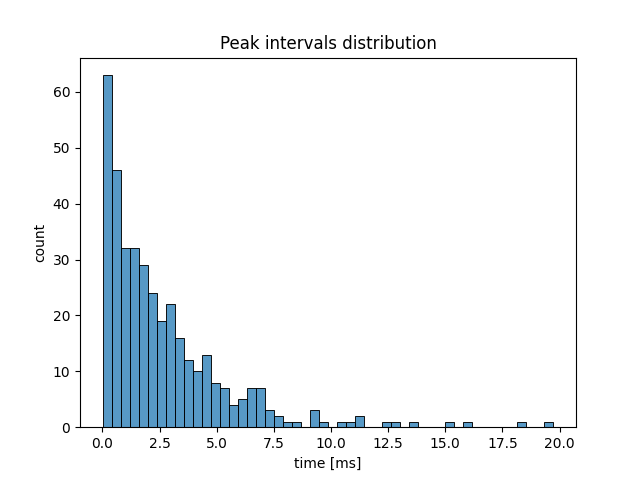

In [25]:
# rozkład odstępów 

diffs = peaks_ms[1:] - peaks_ms[:-1]

fig, ax = plt.subplots()
seaborn.histplot(diffs, kde=False, bins=50, stat="count")
plt.xlabel("time [ms]")
plt.ylabel("count")
plt.title("Peak intervals distribution")
plt.show()

In [7]:
# funkcja gestosci prawdopodobienstwa rozkladu wykladniczego:
# dla x >= 0: labda * e^(-labda*x), dla x < 0: 0

# funkcja gestosci prawdopodobienstwa rozkladu wykladniczego ucietego:
# dla x >= 0: labda * e^(-labda*(x-x0)) * (e^(-labda*x0)), dla x < 0: 0, gdzie x0 to próg uciecia

def pdf_cut_exp(x, lmbd):
    return lmbd * numpy.exp(-lmbd*x)

In [8]:
# sprawdzic czy fgp calkuje sie do 1
pdf_with_params = lambda x: pdf_cut_exp(x, 7)
scipy.integrate.quad(pdf_with_params, 0, numpy.inf)

(1.0, 1.0068740528394206e-11)

In [19]:
def MLE_exp(x:numpy.array) -> float:
    return len(x) / sum(x)

In [20]:
estimated_lamda = MLE_exp(diffs)
pdf_with_params = lambda x: pdf_cut_exp(x, estimated_lamda)

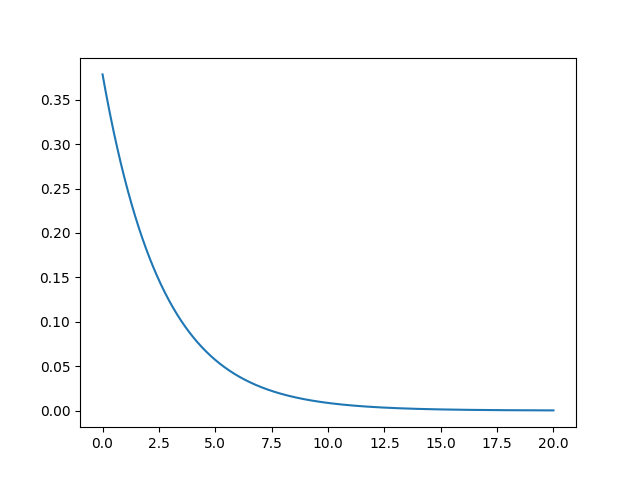

In [23]:
x_values = numpy.linspace(0, 20, 1000)
y_values = pdf_with_params(x_values)

plt.figure()
seaborn.lineplot(x=x_values, y=y_values)
plt.show()

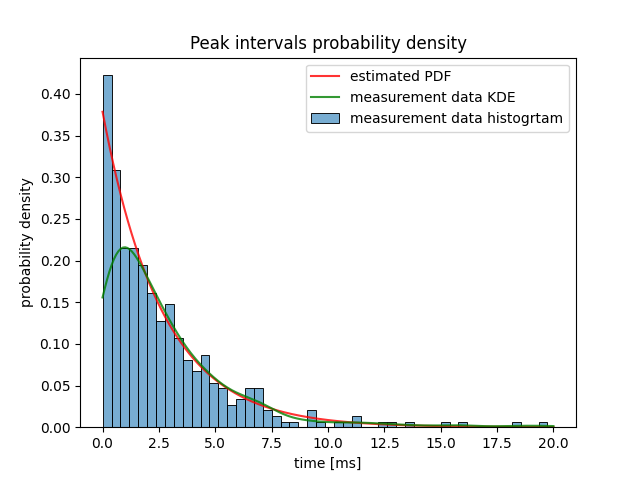

In [51]:
plt.figure()
seaborn.histplot(diffs, kde=False, bins=50, stat="density", label='measurement data histogrtam', alpha=0.6)
seaborn.lineplot(x=x_values, y=y_values, label='estimated PDF', color='red', alpha=0.8)
seaborn.kdeplot(diffs, label='measurement data KDE', color='green', clip=(0,20), alpha=0.8)
plt.legend()
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density")
plt.show()

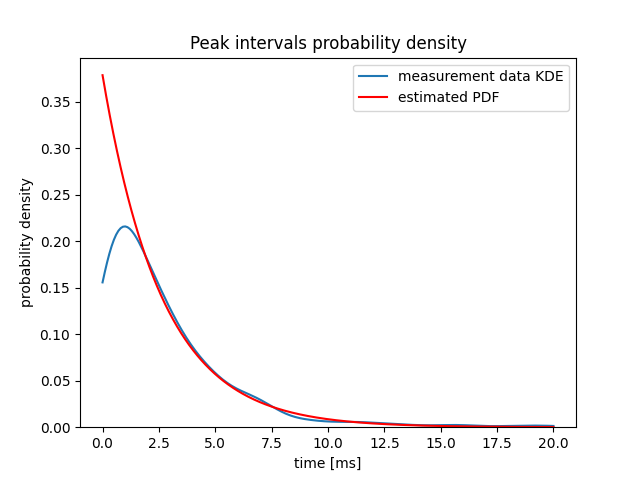

In [43]:
plt.figure()
seaborn.kdeplot(diffs, label='measurement data KDE', clip=(0,20))
seaborn.lineplot(x=x_values, y=y_values, label='estimated PDF', color='red')
plt.xlabel("time [ms]")
plt.ylabel("probability density")
plt.title("Peak intervals probability density")
plt.show()